# Upre Vinod,DS20SEP03,prabhasbablu123@gmail.com

In [1]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('C:/Users/vikas/Downloads/ML Project1_BMP/bank-marketing.csv')

In [96]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
df.response.value_counts()

no     39922
yes     5289
Name: response, dtype: int64

In [7]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:>

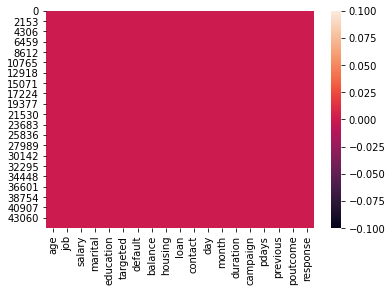

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [10]:
# 1 -Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [11]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [12]:
print('median',df.pdays.median())
print('mean:',df.pdays.mean())
print('mode:',df.pdays.mode())

median -1.0
mean: 40.19782796222158
mode: 0   -1
dtype: int64


In pdays column most of the records contain -1 values

<AxesSubplot:xlabel='pdays'>

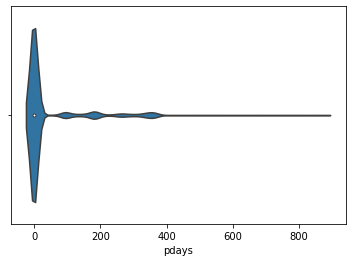

In [13]:
sns.violinplot(df['pdays'])

In [14]:
#2 - Describe the pdays column again, this time limiting yourself to the relevant values of pdays.
#How different are the mean and the median values?

In [15]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [16]:
df.pdays[df['pdays'] != -1].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

<AxesSubplot:xlabel='pdays'>

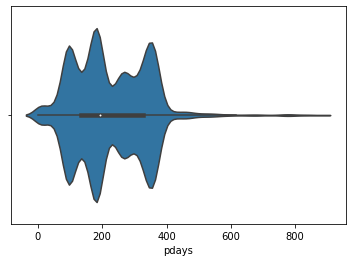

In [17]:
sns.violinplot(df.pdays[df['pdays'] != -1])

In [18]:
pdays= df[df['pdays'] != -1]

In [19]:
print('median',pdays.pdays.median())
print('mean:',pdays.pdays.mean())
print('mode:',pdays.pdays.mode())

median 194.0
mean: 224.57769165556496
mode: 0    182
dtype: int64


As there are no values for customers who were not approached ( -1). The mean median and mode have changed significantly.


In [20]:
#Plot a horizontal bar graph with the median values of balance for each education level value. 
#Which group has the highest median?

<AxesSubplot:ylabel='education'>

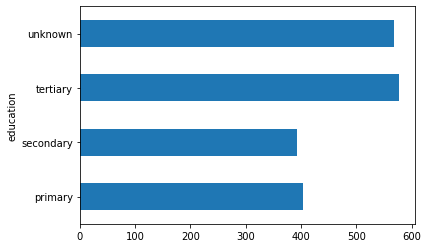

In [21]:
df.groupby(['education'])['balance'].median().plot.barh()

tertiary level education has is the highest median 

In [22]:
#Make a box plot for pdays. Do you see any outliers?

outliers with having -1 values


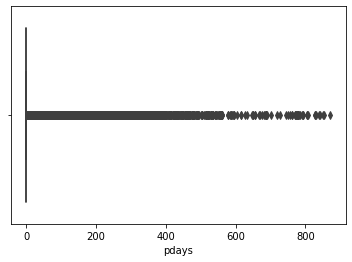

In [23]:
sns.boxplot('pdays',data=df)
print('outliers with having -1 values')

outliers without -1 values


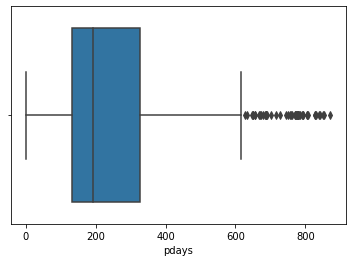

In [24]:
sns.boxplot('pdays',data=df[df['pdays'] != -1])
print('outliers without -1 values')

There much more outliers in pdyas

<AxesSubplot:>

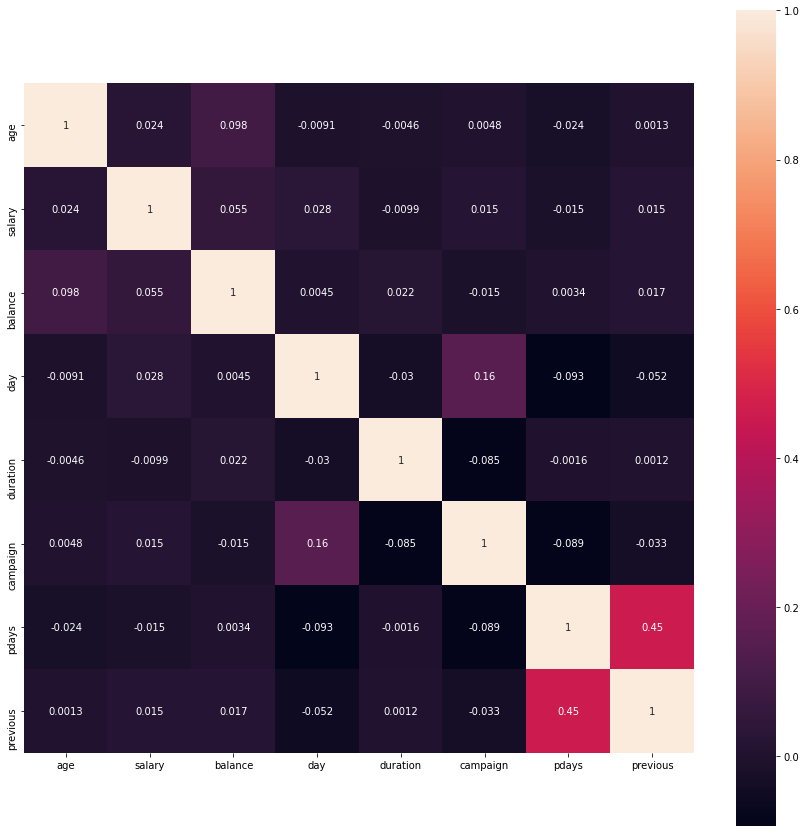

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),square=True,annot=True)

In [26]:
df.nunique()

age            77
job            12
salary         11
marital         3
education       4
targeted        2
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
response        2
dtype: int64

In [27]:
df1=df.drop(df[df['pdays'] < 0].index)

In [28]:
df1.shape

(8257, 19)

In [29]:
##replacing response into 1 and 0
df1.replace({'response':{'yes':1,'no':0}},inplace=True)

In [30]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


In [31]:
##separating categorical and numerical
cols = df1.columns
num_cols= df1._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [32]:
print(num_cols)
print(cat_cols)

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'response'],
      dtype='object')
['targeted', 'month', 'contact', 'education', 'loan', 'job', 'poutcome', 'marital', 'housing', 'default']


In [33]:
#visualizing categorical features with response

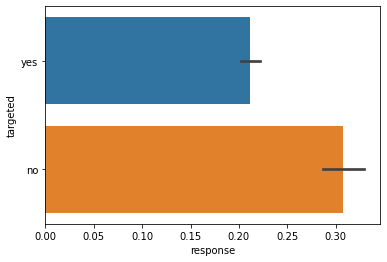

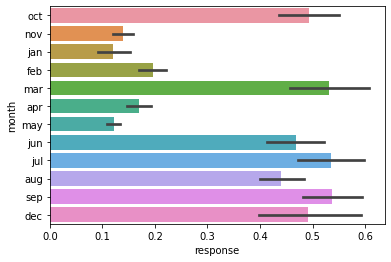

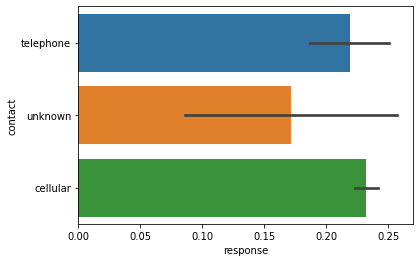

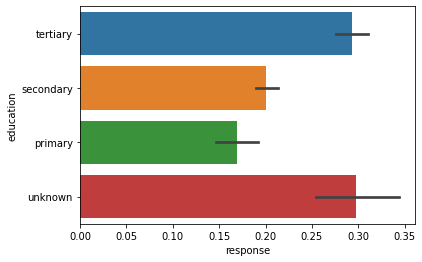

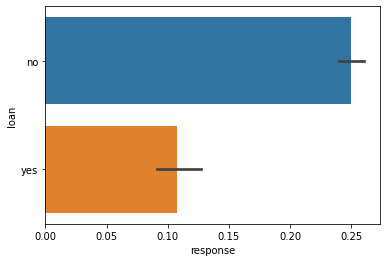

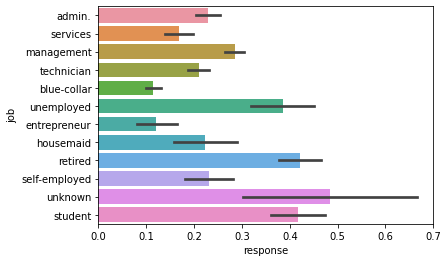

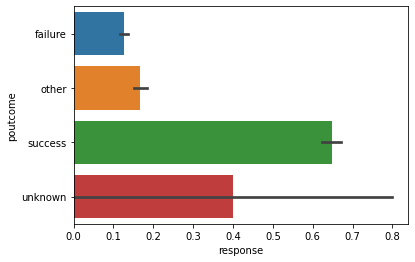

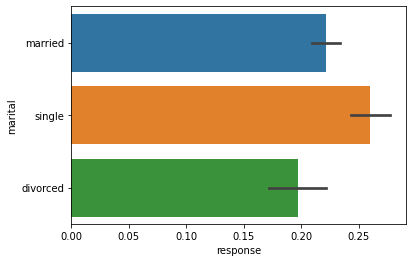

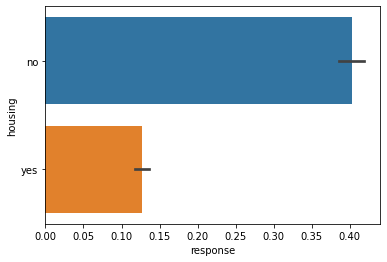

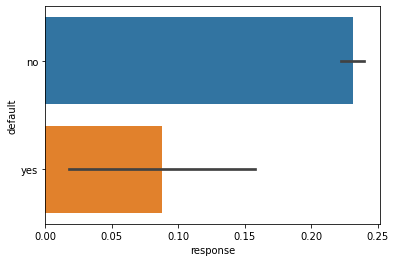

In [34]:
for i in df1[cat_cols]:
    sns.barplot(df1.response,df1[i])
    plt.show()

In [35]:
#visualizing numercal features with response

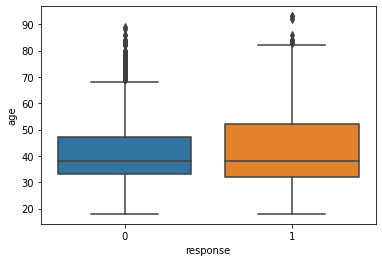

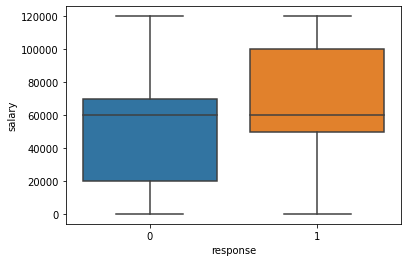

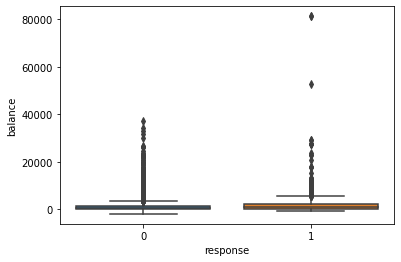

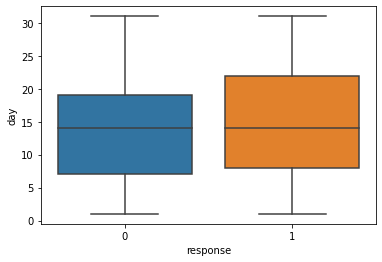

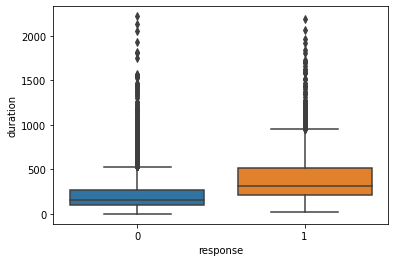

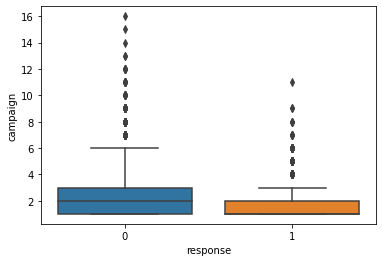

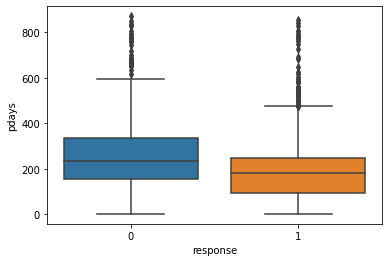

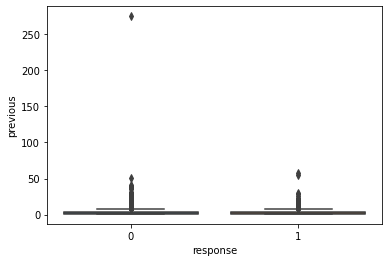

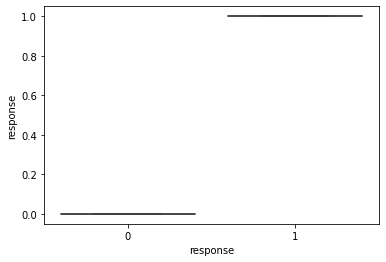

In [36]:
for i in df1[num_cols]:
    sns.boxplot(df1.response,df1[i])
    plt.show()

In [37]:
df1[cat_cols]

,targeted,month,contact,education,loan,job,poutcome,marital,housing,default
24060,yes,oct,telephone,tertiary,no,admin.,failure,married,no,no
24062,yes,oct,telephone,secondary,yes,admin.,other,single,yes,no
24064,yes,oct,telephone,secondary,no,services,failure,married,yes,no
24072,yes,oct,telephone,tertiary,no,management,other,married,yes,no
24077,yes,oct,telephone,tertiary,no,management,failure,married,yes,no
...,...,...,...,...,...,...,...,...,...,...
45199,yes,nov,cellular,secondary,no,blue-collar,other,single,yes,no
45201,yes,nov,cellular,tertiary,no,management,success,married,no,no
45204,yes,nov,cellular,secondary,no,retired,failure,married,no,no
45208,yes,nov,cellular,secondary,no,retired,success,married,no,no


In [38]:
df1[cat_cols].nunique()

targeted      2
month        12
contact       3
education     4
loan          2
job          12
poutcome      4
marital       3
housing       2
default       2
dtype: int64

In [39]:
df1[num_cols]

,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,33,50000,882,21,39,1,151,3,0
24062,42,50000,-247,21,519,1,166,1,1
24064,33,70000,3444,21,144,1,91,4,1
24072,36,100000,2415,22,73,1,86,4,0
24077,36,100000,0,23,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...
45199,34,20000,1475,16,1166,3,530,12,0
45201,53,100000,583,17,226,1,184,4,1
45204,73,55000,2850,17,300,1,40,8,1
45208,72,55000,5715,17,1127,5,184,3,1


In [40]:
##prprocessing
from sklearn.preprocessing import LabelEncoder

In [41]:
df_cat = df1[cat_cols].apply(LabelEncoder().fit_transform)

In [42]:
df_cat

,targeted,month,contact,education,loan,job,poutcome,marital,housing,default
24060,1,10,1,2,0,0,0,1,0,0
24062,1,10,1,1,1,0,1,2,1,0
24064,1,10,1,1,0,7,0,1,1,0
24072,1,10,1,2,0,4,1,1,1,0
24077,1,10,1,2,0,4,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
45199,1,9,0,1,0,1,1,2,1,0
45201,1,9,0,2,0,4,2,1,0,0
45204,1,9,0,1,0,5,0,1,0,0
45208,1,9,0,1,0,5,2,1,0,0


In [43]:
dff = df_cat.join(df1[num_cols])

In [44]:
dff

,targeted,month,contact,education,loan,job,poutcome,marital,housing,default,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,1,10,1,2,0,0,0,1,0,0,33,50000,882,21,39,1,151,3,0
24062,1,10,1,1,1,0,1,2,1,0,42,50000,-247,21,519,1,166,1,1
24064,1,10,1,1,0,7,0,1,1,0,33,70000,3444,21,144,1,91,4,1
24072,1,10,1,2,0,4,1,1,1,0,36,100000,2415,22,73,1,86,4,0
24077,1,10,1,2,0,4,0,1,1,0,36,100000,0,23,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,9,0,1,0,1,1,2,1,0,34,20000,1475,16,1166,3,530,12,0
45201,1,9,0,2,0,4,2,1,0,0,53,100000,583,17,226,1,184,4,1
45204,1,9,0,1,0,5,0,1,0,0,73,55000,2850,17,300,1,40,8,1
45208,1,9,0,1,0,5,2,1,0,0,72,55000,5715,17,1127,5,184,3,1


<AxesSubplot:>

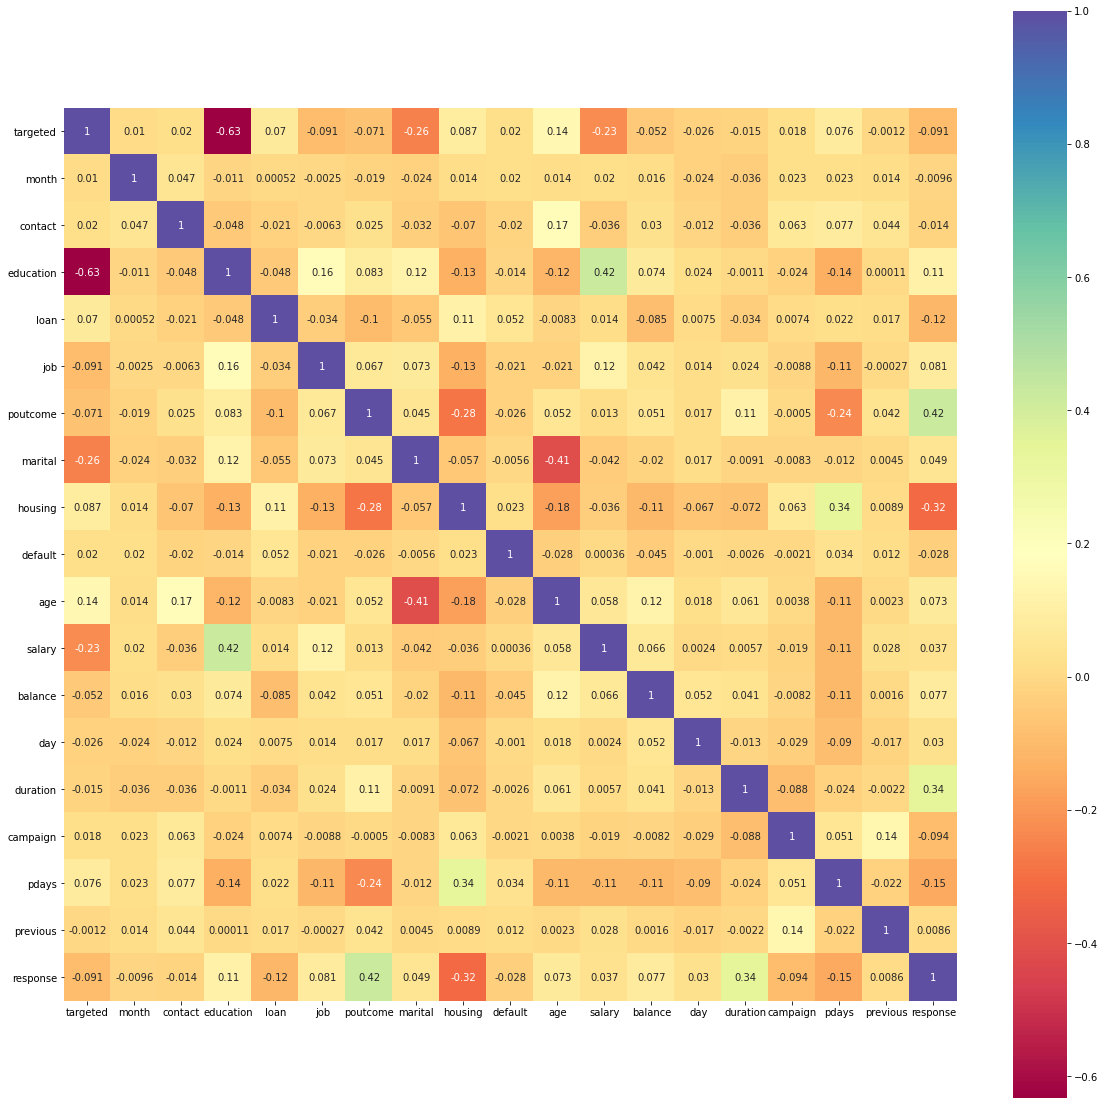

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(dff.corr(),square=True,annot=True,cmap= 'Spectral')

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [47]:
##deviding data into independent and target variable
X = dff.drop('response',axis=1)
y = dff['response']

In [48]:
X.head()

,targeted,month,contact,education,loan,job,poutcome,marital,housing,default,age,salary,balance,day,duration,campaign,pdays,previous
24060,1,10,1,2,0,0,0,1,0,0,33,50000,882,21,39,1,151,3
24062,1,10,1,1,1,0,1,2,1,0,42,50000,-247,21,519,1,166,1
24064,1,10,1,1,0,7,0,1,1,0,33,70000,3444,21,144,1,91,4
24072,1,10,1,2,0,4,1,1,1,0,36,100000,2415,22,73,1,86,4
24077,1,10,1,2,0,4,0,1,1,0,36,100000,0,23,140,1,143,3


In [49]:
y.head()

24060    0
24062    1
24064    1
24072    0
24077    1
Name: response, dtype: int64

In [50]:
##splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5779, 18), (2478, 18), (5779,), (2478,))

In [52]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [53]:
print('Report:\n',classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_pred,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))

Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1915
           1       0.56      0.17      0.26       563

    accuracy                           0.78      2478
   macro avg       0.68      0.57      0.57      2478
weighted avg       0.74      0.78      0.73      2478

F1 Score: 0.2615803814713896
confusion Matrix:
 [[1840  467]
 [  75   96]]
cross validation: [0.79539952 0.72094431 0.77892187 0.7752877  0.75529982]


In [54]:
##using RFE feature selection
from sklearn.feature_selection import RFE
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X_train,y_train)
X_train_selected = rfe.transform(X_train)
X_train_selected.shape

(5779, 10)

In [55]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
lr.fit(X_train[cols],y_train)
y_pred2 = lr.predict(X_test[cols])

Index(['targeted', 'contact', 'education', 'loan', 'job', 'poutcome',
       'marital', 'housing', 'default', 'campaign'],
      dtype='object')


In [56]:
print('Report:\n',classification_report(y_test, y_pred2))
print("F1 Score:",f1_score(y_pred2,y_test))
print('AUC score:',roc_auc_score(y_test,y_pred2))
print('confusion Matrix:\n',confusion_matrix(y_pred2,y_test))

Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      1915
           1       0.71      0.38      0.49       563

    accuracy                           0.82      2478
   macro avg       0.77      0.67      0.69      2478
weighted avg       0.81      0.82      0.80      2478

F1 Score: 0.49479768786127165
AUC score: 0.6670767846625454
confusion Matrix:
 [[1827  349]
 [  88  214]]


In [57]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
start = "\033[1m" ### for bold text
print(start)
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:               response   R-squared (uncentered):                   0.473
Model:                            OLS   Adj. R-squared (uncentered):              0.471
Method:                 Least Squares   F-statistic:                              410.2
Date:                Sun, 07 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:01:37   Log-Likelihood:                         -3019.6
No. Observations:                8257   AIC:                                      6075.
Df Residuals:                    8239   BIC:                                      6202.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [58]:
##from above summery we can say that some of features are higher p value,so lets check vifs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.66
0,targeted,6.44
3,education,6.38
11,salary,5.36
16,pdays,5.23
7,marital,4.37
13,day,4.07
1,month,3.56
8,housing,3.13
5,job,2.92


In [59]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lr)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['month', 'poutcome', 'housing', 'day', 'campaign', 'previous'], dtype='object')

In [60]:
X_cols =X.loc[:,['housing', 'month', 'poutcome', 'day','campaign', 'previous']]

In [61]:
X_cols

,housing,month,poutcome,day,campaign,previous
24060,0,10,0,21,1,3
24062,1,10,1,21,1,1
24064,1,10,0,21,1,4
24072,1,10,1,22,1,4
24077,1,10,0,23,1,3
...,...,...,...,...,...,...
45199,1,9,1,16,3,12
45201,0,9,2,17,1,4
45204,0,9,0,17,1,8
45208,0,9,2,17,5,3


In [62]:
cross_val_score(lr,X_cols,y)

array([0.75121065, 0.84200969, 0.86553604, 0.84736523, 0.66989703])

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(n_estimators=20,max_depth=5,criterion='entropy',n_jobs=1,random_state=101)

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=20,
                       n_jobs=1, random_state=101)

In [66]:
y_pred1 = rfc.predict(X_test)

In [67]:
print('Report:\n',classification_report(y_test, y_pred1))
print("F1 Score:",f1_score(y_pred1,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred1,y_test))

Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1915
           1       0.79      0.39      0.52       563

    accuracy                           0.84      2478
   macro avg       0.82      0.68      0.71      2478
weighted avg       0.83      0.84      0.82      2478

F1 Score: 0.5249406175771972
confusion Matrix:
 [[1857  342]
 [  58  221]]


In [68]:
cross_val_score(rfc,X,y)

array([0.77602906, 0.81840194, 0.85342217, 0.85342217, 0.59539673])

In [69]:
features=rfc.feature_importances_

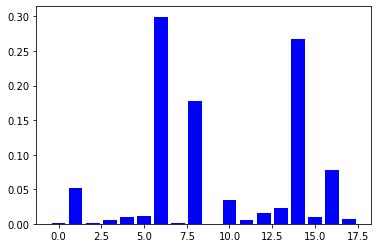

In [70]:
plt.bar(range(X_train.shape[1]),features,color='blue')
plt.show()

In [71]:
imp_df = dff.iloc[:,[2,4,5,14,16]]

In [72]:
imp_df

,contact,loan,job,duration,pdays
24060,1,0,0,39,151
24062,1,1,0,519,166
24064,1,0,7,144,91
24072,1,0,4,73,86
24077,1,0,4,140,143
...,...,...,...,...,...
45199,0,0,1,1166,530
45201,0,0,4,226,184
45204,0,0,5,300,40
45208,0,0,5,1127,184


In [73]:
y

24060    0
24062    1
24064    1
24072    0
24077    1
        ..
45199    0
45201    1
45204    1
45208    1
45210    0
Name: response, Length: 8257, dtype: int64

In [74]:
x_train,x_test,y_train,y_test = train_test_split(imp_df,y,test_size=0.2,random_state=0)

In [75]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6605, 5), (1652, 5), (6605,), (1652,))

In [76]:
##logistic regression with imp features
logreg=LogisticRegression(random_state=0)

In [77]:
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [78]:
y_predf = logreg.predict(x_test)

In [79]:
def LR():
    print('Report:\n',classification_report(y_test, y_predf))
    print("F1 Score:",f1_score(y_test,y_predf))
    print('confusion Matrix:\n',confusion_matrix(y_test,y_predf))

In [80]:
LR()

Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      1255
           1       0.61      0.20      0.31       397

    accuracy                           0.78      1652
   macro avg       0.70      0.58      0.59      1652
weighted avg       0.75      0.78      0.73      1652

F1 Score: 0.3056603773584906
confusion Matrix:
 [[1203   52]
 [ 316   81]]


In [81]:
rfcf = RandomForestClassifier(criterion='gini',n_estimators=40,n_jobs=1,max_depth=5,random_state=0)

In [82]:
rfcf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=40, n_jobs=1, random_state=0)

In [83]:
y_predicf=rfcf.predict(x_test)

In [84]:
def RFC():
    print('Report:\n',classification_report(y_test, y_predicf))
    print("F1 Score:",f1_score(y_test,y_predicf))
    print('confusion Matrix:\n',confusion_matrix(y_test,y_predicf))

In [85]:
RFC()

Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      1255
           1       0.64      0.29      0.40       397

    accuracy                           0.79      1652
   macro avg       0.72      0.62      0.64      1652
weighted avg       0.77      0.79      0.76      1652

F1 Score: 0.40138408304498274
confusion Matrix:
 [[1190   65]
 [ 281  116]]


If we compare both models that is logisticregression an random forest classifier ,the scores of both models little bit different
after train with important featuers both doing good not very good but its okay and i didnt normalize the numerical features
if we normalize or standerdize the numeric cols the accuracy will increase.

# Thank you BoardInfinity and Thanks to punith sir

In [ ]:
###without dropping pdays -1 values

In [97]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#Pdays: number of days that passed by after the client was last
#contacted from a previous campaign (numeric; 999 means client was not
#previously contacted)

In [98]:
df['pdays'].replace(-1,999,inplace=True)

In [101]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,999,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,999,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,999,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,999,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,999,0,unknown,no


In [105]:
labelencoder_X = LabelEncoder()
df['job']      = labelencoder_X.fit_transform(df['job']) 
df['marital']  = labelencoder_X.fit_transform(df['marital']) 
df['education']= labelencoder_X.fit_transform(df['education'])
df['targeted'] = labelencoder_X.fit_transform(df['targeted'])
df['default']  = labelencoder_X.fit_transform(df['default']) 
df['housing']  = labelencoder_X.fit_transform(df['housing']) 
df['loan']     = labelencoder_X.fit_transform(df['loan'])
df['contact']     = labelencoder_X.fit_transform(df['contact']) 
df['month']       = labelencoder_X.fit_transform(df['month']) 
df['poutcome'] = labelencoder_X.fit_transform(df['poutcome'])
df['response'] = labelencoder_X.fit_transform(df['response'])

In [106]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,4,100000,1,2,1,0,2143,1,0,2,5,8,261,1,999,0,3,0
1,44,9,60000,2,1,1,0,29,1,0,2,5,8,151,1,999,0,3,0
2,33,2,120000,1,1,1,0,2,1,1,2,5,8,76,1,999,0,3,0
3,47,1,20000,1,3,0,0,1506,1,0,2,5,8,92,1,999,0,3,0
4,33,11,0,2,3,0,0,1,0,0,2,5,8,198,1,999,0,3,0


In [108]:
df.shape

(45211, 19)

In [115]:
X=df.drop('response',axis=1)
y=df['response']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [117]:
X_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3734,26,1,20000,2,0,1,0,102,1,0,2,16,8,46,1,999,0,3
28119,43,4,100000,1,2,1,0,182,0,0,0,28,4,152,1,999,0,3
36942,37,9,60000,1,1,1,0,807,1,0,0,12,8,807,3,172,4,0
4710,32,1,20000,1,0,1,0,80,1,0,2,20,8,614,2,999,0,3
26402,33,2,120000,1,2,1,0,0,0,0,0,20,9,232,1,999,0,3


In [118]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [119]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7787  157]
 [ 748  351]]
90.0


k=1 84.88 (+/- 0.56)
k=2 88.09 (+/- 0.52)
k=3 87.46 (+/- 0.61)
k=4 88.42 (+/- 0.57)
k=5 88.08 (+/- 0.57)
k=6 88.52 (+/- 0.44)
k=7 88.30 (+/- 0.60)
k=8 88.54 (+/- 0.44)
k=9 88.50 (+/- 0.50)
k=10 88.51 (+/- 0.46)
k=11 88.63 (+/- 0.50)
k=12 88.67 (+/- 0.46)
k=13 88.76 (+/- 0.50)
k=14 88.75 (+/- 0.54)
k=15 88.76 (+/- 0.51)
k=16 88.72 (+/- 0.51)
k=17 88.69 (+/- 0.54)
k=18 88.74 (+/- 0.58)
k=19 88.73 (+/- 0.53)
k=20 88.76 (+/- 0.57)
k=21 88.79 (+/- 0.52)
k=22 88.81 (+/- 0.63)
k=23 88.81 (+/- 0.54)
k=24 88.74 (+/- 0.54)
k=25 88.75 (+/- 0.52)
The optimal number of neighbors is 22 with 88.8%


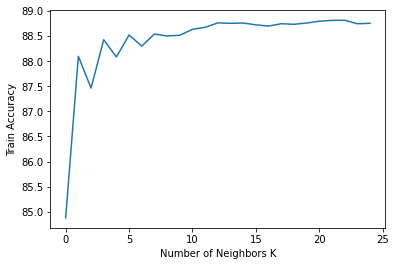

In [120]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(X, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [121]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7838  106]
 [ 860  239]]
89.0


In [122]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7299  645]
 [ 760  339]]
84.0


In [123]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7372  572]
 [ 566  533]]
87.0


In [124]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7753  191]
 [ 657  442]]
91.0


In [125]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6958  986]
 [ 478  621]]
84.0


In [126]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[7668  276]
 [ 565  534]]
91.0


In [127]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7756  188]
 [ 654  445]]
91.0


In [128]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
6,XGBoost,0.908206
0,Random Forest Classifier,0.903893
7,Gradient Boosting,0.903284
4,Logistic Model,0.898612
3,K-Near Neighbors,0.894962
1,Decision Tree Classifier,0.872374
2,Support Vector Machine,0.844531
5,Gausian NB,0.836292
